# Regression  problem
Case: Predict car price based on some related features as an input such as Years, Kms_driven, Fuel type etc..

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#read the dataset
car_dataset = pd.read_csv("car data.csv")

In [3]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
print("Shape: ",  car_dataset.shape)
#check the categorical features.

Shape:  (301, 9)


In [5]:
#Step1 Missing values
car_dataset.isnull().sum()
#Since there are no null values, let proceed with other steps

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
#Step2 check categorical feature.

categorical_feature = [feature for feature in car_dataset.columns if car_dataset[feature].dtypes == 'O']
categorical_feature.append('Owner')
categorical_feature

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

In [7]:
# lets print unique value from above features

for feature in categorical_feature:
    if feature != 'Car_Name':
        print(car_dataset[feature].unique())
    

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [8]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
#Temporal date lets create one more feature to know the age of the year or how old it is.
#Current year as 2021 to calulate the age
car_dataset['How_old'] = 2021 - car_dataset['Year']


In [10]:
car_dataset.drop(['Year','Car_Name'], inplace=True, axis=1)

In [11]:
car_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,How_old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [12]:
# Now converting categorical features into numbers i.e in one hot encoding
# Since the unique values are less, so we will use get_dummies() and will perform dummy variable trap to delete one extra feature.

car_dataset =  pd.get_dummies(car_dataset, drop_first=True)
car_dataset

,Selling_Price,Present_Price,Kms_Driven,Owner,How_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,1,0,0,1
297,4.00,5.90,60000,0,6,0,1,0,1
298,3.35,11.00,87934,0,12,0,1,0,1
299,11.50,12.50,9000,0,4,1,0,0,1


In [13]:
# Lets figure out the correlation of the features.Couple ways are there:
#1. corr() func, matplotlib, seaborn

car_dataset.corr()


 

,Selling_Price,Present_Price,Kms_Driven,Owner,How_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
How_old,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


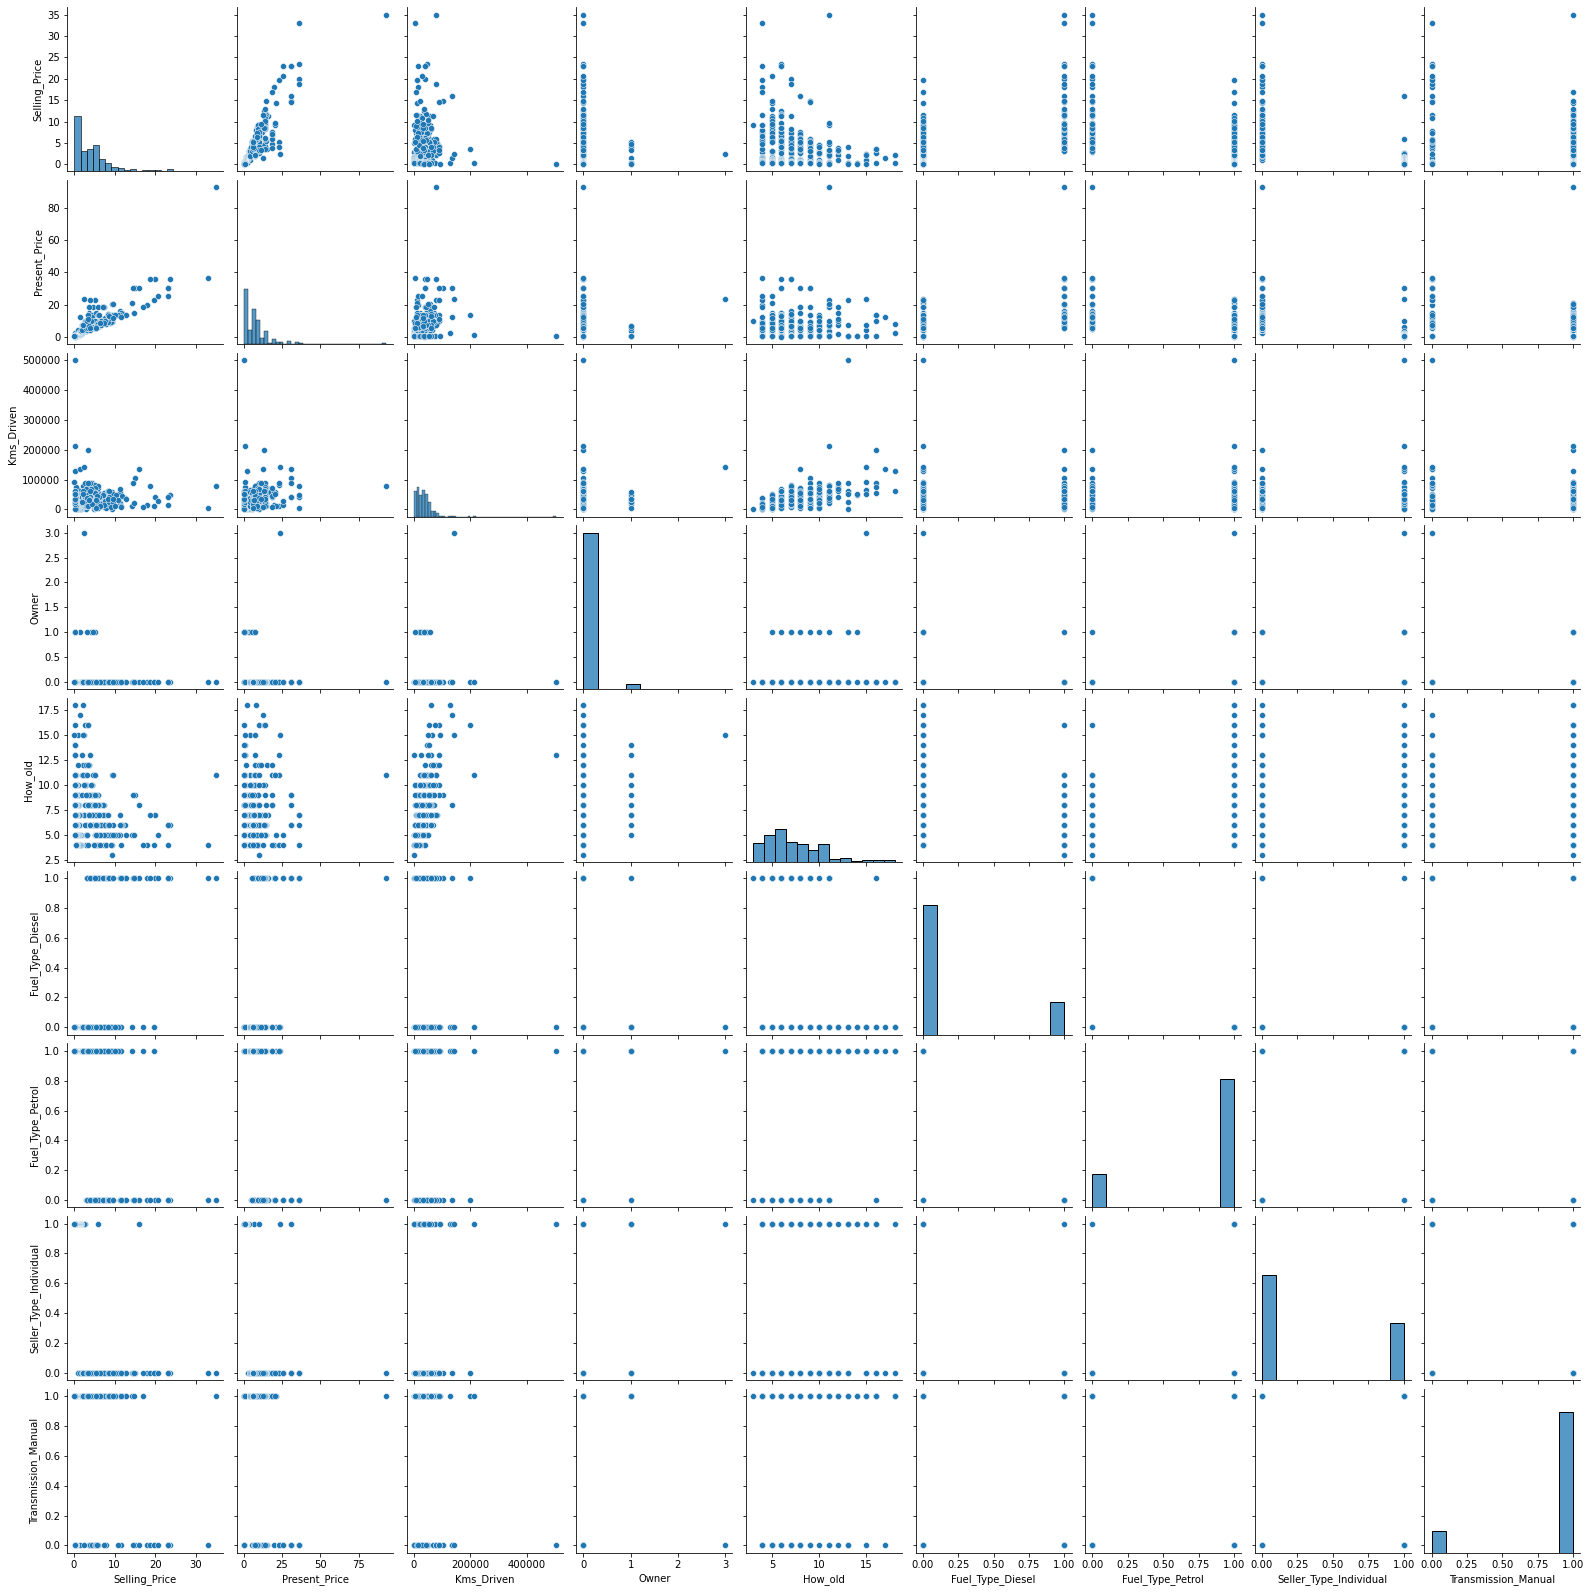

In [14]:
#Second way to know the relationship
sns.pairplot(car_dataset)

<AxesSubplot:>

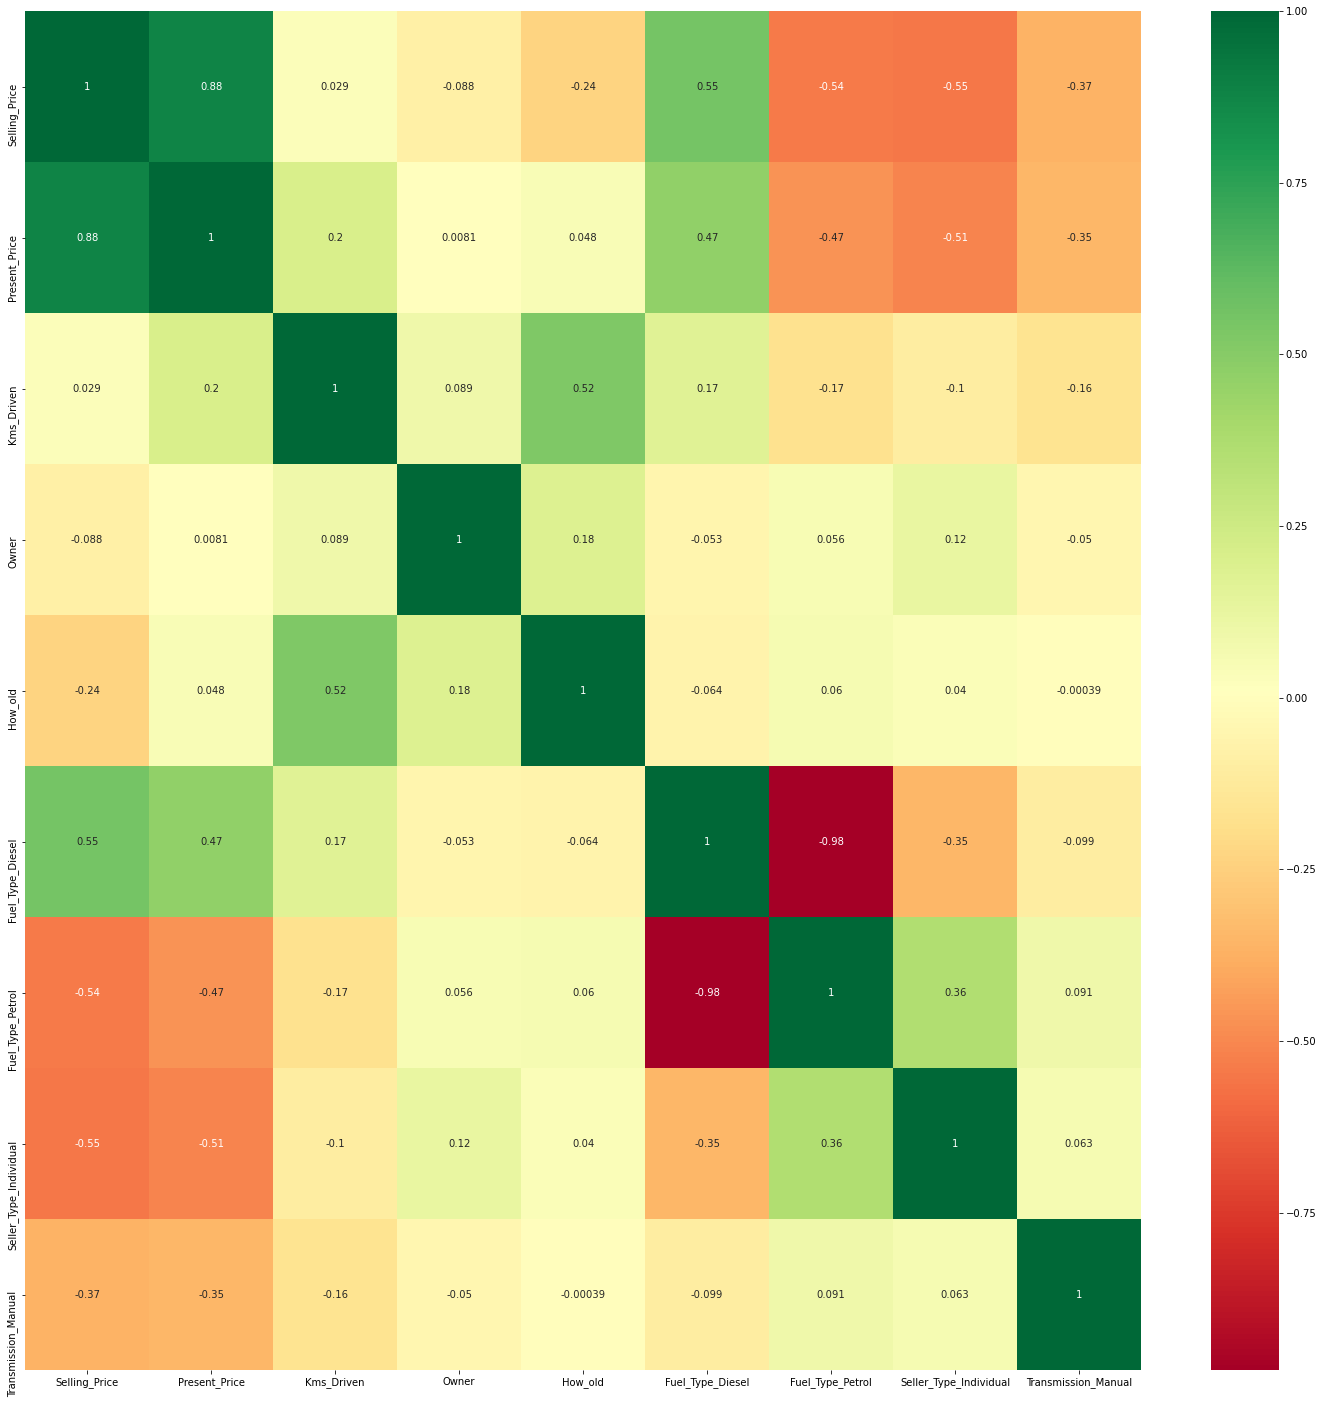

In [15]:
#Third way to know the relationship
import matplotlib.pyplot as plt
matrix = car_dataset.corr()
top_corr_features = matrix.index
plt.figure(figsize=(25,25))
#heatmap
sns.heatmap(matrix, annot=True, cmap='RdYlGn')

In [16]:
#Now separate independent and dependent feature
# Our dependent feature is "Selling_Price" and rest of the features will be independent features.
X = car_dataset.iloc[:,1:]
y = car_dataset.iloc[:,0] # or car_dataset.Selling_Price
print("Independent/input features: ", list(X.columns))


Independent/input features:  ['Present_Price', 'Kms_Driven', 'Owner', 'How_old', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']


In [17]:
#ExtraTreeRegressor to know which are the important features
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X,y)

ExtraTreesRegressor()

In [18]:
etr.feature_importances_

array([0.37475743, 0.04039963, 0.00078393, 0.07480471, 0.2338946 ,
       0.01127559, 0.12638528, 0.13769884])

In [19]:
car_dataset.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'How_old',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

<AxesSubplot:>

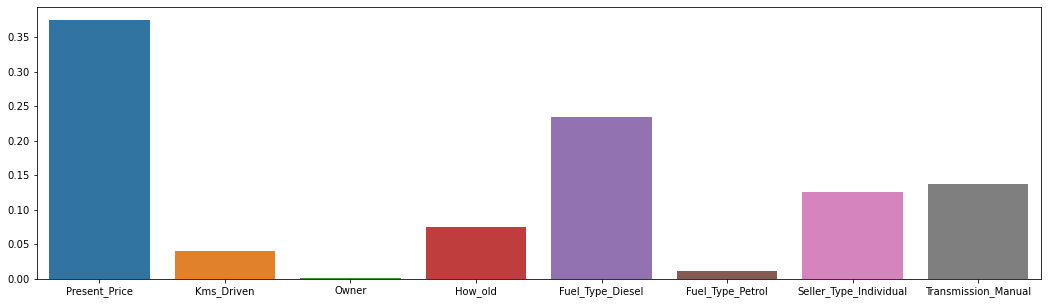

In [20]:
# lets visualise this on graph
plt.figure(figsize=(18,5))
sns.barplot(x=car_dataset.columns[1:], y=etr.feature_importances_)

In [21]:
#Now train test split
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
# now implementing model, since it is regression problem, we can use any regresion algorithm
# We will use RandomForestRegressor, in this we dont require to perform feature scaling.

from sklearn.ensemble import RandomForestRegressor
#criterion is default i.e mse
# To avoid any overfitting problem we will do hyperparameter tunning to get best params for our model
rand_grid ={
    'n_estimators' : [ int(x) for x in np.linspace(start=100, stop=2000, num=10)],
    #number of features to consider at every split
    'max_features' : ['auto','sqrt'],
    #max number of levels in tree
    'max_depth' : [int(x) for x in np.linspace(start=5,stop=30, num=6)],
    #minimum number of samples required to split
    'min_samples_split' : [2, 5,10,15,100],
    #minimum number of samples required to split a node
    'min_samples_leaf' : [1,2,5,10]
}
print(rand_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [23]:
from sklearn.model_selection import RandomizedSearchCV
rfr = RandomForestRegressor()
rscv = RandomizedSearchCV(estimator=rfr,param_distributions=rand_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [24]:
rscv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [25]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [26]:
#rfc = RandomForestRegressor(n_estimators= 400, max_depth=25, max_features='auto', min_samples_split=10,min_samples_leaf=1)

In [27]:
#rfc.fit(X_train, y_train)

In [28]:
#predicted = rfc.predict(X_test)

In [29]:
#sns.distplot(predicted)

predicted = rscv.predict(X_test)

D:\Data_Science\environments\car_predict_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

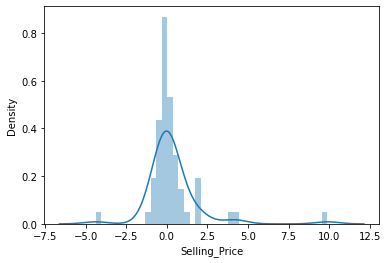

In [34]:
sns.distplot(y_test - predicted)

D:\Data_Science\environments\car_predict_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price'>

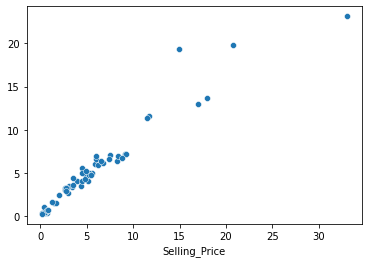

In [31]:
sns.scatterplot(y_test, predicted)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("RMSE: ",np.sqrt(mean_squared_error(y_true=y_test, y_pred=predicted)))
print("MAE: ",mean_absolute_error(y_true=y_test, y_pred=predicted))
print("MSE: ", mean_squared_error(y_true=y_test, y_pred=predicted))

RMSE:  1.7199703616673057
MAE:  0.8268720639060391
MSE:  2.958298045013962


In [33]:
import pickle
# Pickle a file
file = open('radom_forest_regression.pkl','wb')
pickle.dump(rscv, file)